In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# basic
import os
import os.path as op
import sys

# common
import numpy as np
import pandas as pd
import xarray as xr
from scipy.io import loadmat

# matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

#Kmeans
from sklearn.cluster import KMeans

#Normalize and DeNormalize functions inside kmeans.py
from kmeans import Normalize, DeNormalize

# Clustering - KMeans

## 2D

In [3]:
x = [1, 4, 5, 8, 15, 18, 50, 4, 7, 8, 9, 3, 30]
y = [6, 8, 9, 5, 1, 2, 3, 8, 9, 10, 14, 17, 14]

In [4]:
matrix_kmeans = np.vstack([x,y]).T
matrix_kmeans.shape #[Number of points] x [Number of dimensions]

(13, 2)

In [5]:
n_subset = 5   # subset size

kmeans = KMeans(n_clusters=n_subset, random_state=0).fit(matrix_kmeans)
kmeans

KMeans(n_clusters=5, random_state=0)

In [6]:
bmus = kmeans.labels_
centroids = kmeans.cluster_centers_

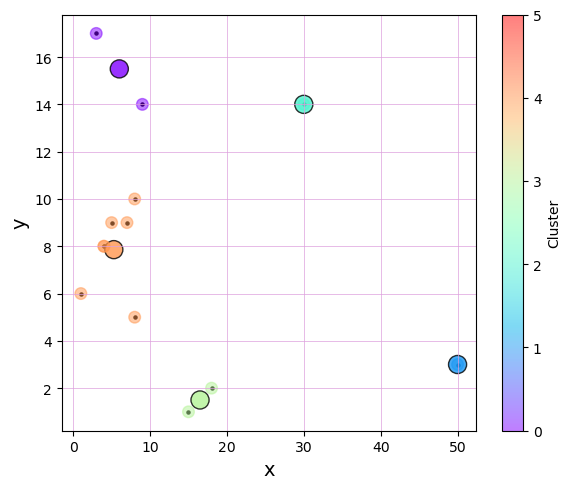

In [7]:
v1, v1_l = x, 'x' # Data, Name
v2, v2_l = y, 'y' # Data, Name

fig = plt.figure(figsize = [6, 5], tight_layout=True)
gs = gridspec.GridSpec(1,1)

ax = fig.add_subplot(gs[0,0])
ax.scatter(v1,v2,c='k', s=5)
ax.set_xlabel(v1_l, fontsize = 14); ax.set_ylabel(v2_l, fontsize = 14)
ax.grid(':', color = 'plum', linewidth = .5)

# Centroids
im = ax.scatter(centroids[:,0], centroids[:,1], s=170, c=range(len(centroids)), cmap='rainbow',
                vmin=0, vmax=n_subset, alpha=.8, edgecolor = 'black', label = 'centroid')

#Cluster
im = ax.scatter(x, y, c=bmus, s=70, cmap='rainbow', vmin=0, vmax=n_subset, alpha=.5, label = 'Data Points')

plt.colorbar(im).set_label('Cluster')

## 3D

In [8]:
x = [1, 40, 5, 80, 5, 15, 90, 50, 70, 19, 7, 90, 6]
y = [6, 8, 9, 6, 1, 2, 3, 4, 7, 9, 12, 14, 18]
z = [1, 2, 3, 4, 7, 8, 9, 1, 6, 8, 12, 15, 19]

In [9]:
matrix_kmeans2 = np.vstack([x,y,z]).T
matrix_kmeans2.shape #[Number of points] x [Number of dimensions]

(13, 3)

In [10]:
# variables to use
vns = ['x', 'y', 'z']

# subset size, scalar and directional indexes
n_subset = 5      # subset size
ix_scalar = [0, 1, 2]        # x,y,z
ix_directional = []      # 

In [11]:
n_subset = 5   # subset size

kmeans2 = KMeans(n_clusters=n_subset, random_state=0).fit(matrix_kmeans2)

bmus2 = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_

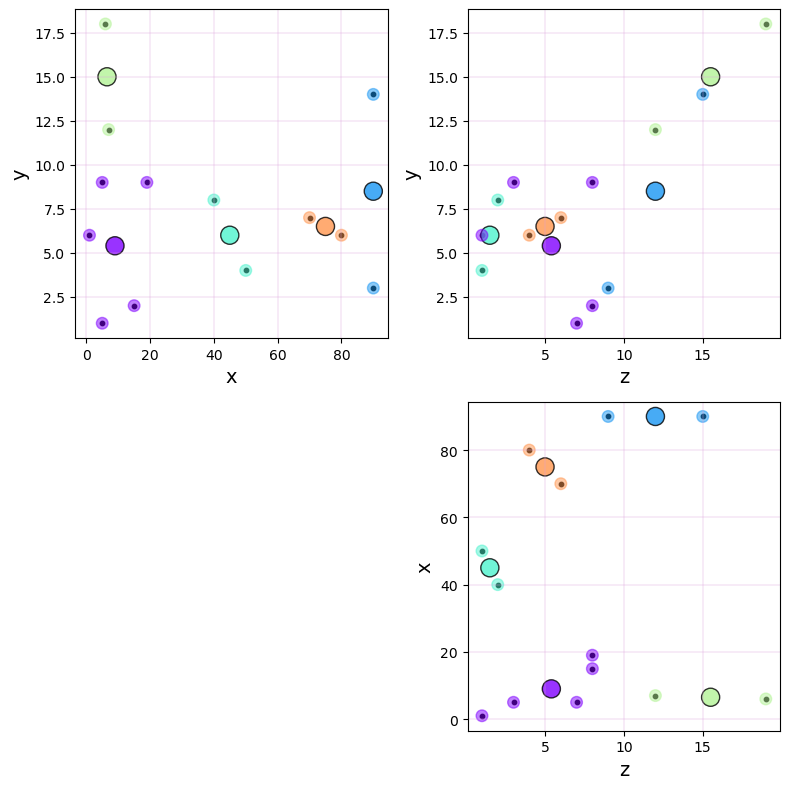

In [12]:
v1, v1_l = x, 'x'
v2, v2_l = y, 'y'
v3, v3_l = z, 'z'

fig = plt.figure(figsize = [8, 8], tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0,0])
ax.scatter(v1,v2,c='k', s=10)
ax.set_xlabel(v1_l, fontsize = 14); ax.set_ylabel(v2_l, fontsize = 14)
ax.grid(':', color = 'plum', linewidth=.3)

ax1 = fig.add_subplot(gs[0,1])
ax1.scatter(v3,v2,c='k', s=10)
ax1.set_xlabel(v3_l, fontsize = 14); ax1.set_ylabel(v2_l, fontsize = 14)
ax1.grid(':', color = 'plum', linewidth=.3)


ax2 = fig.add_subplot(gs[1,1])
ax2.scatter(v3,v1,c='k', s=10)
ax2.set_xlabel(v3_l, fontsize = 14); ax2.set_ylabel(v1_l, fontsize = 14)
ax2.grid(':', color = 'plum', linewidth=.3)

# Centroids
im = ax.scatter(centroids2[:,0], centroids2[:,1], s=170, c=range(len(centroids2)), cmap='rainbow',
                vmin=0, vmax=n_subset, alpha=.8, edgecolor = 'black', label = 'centroid')

ax1.scatter(centroids2[:,2], centroids2[:,1], s=170, c=range(len(centroids2)), cmap='rainbow',
                vmin=0, vmax=n_subset, alpha=.8, edgecolor = 'black', label = 'centroid')


ax2.scatter(centroids2[:,2], centroids2[:,0], s=170, c=range(len(centroids2)), cmap='rainbow',
                vmin=0, vmax=n_subset, alpha=.8, edgecolor = 'black', label = 'centroid')



#Cluster
im = ax.scatter(v1, v2, c=bmus2, s=70, cmap='rainbow', vmin=0, vmax=n_subset,
                alpha=.5, label = 'Data Points')

im = ax1.scatter(v3, v2, c=bmus2, s=70, cmap='rainbow', vmin=0, vmax=n_subset,
                alpha=.5, label = 'Data Points')

im = ax2.scatter(v3, v1, c=bmus2, s=70, cmap='rainbow', vmin=0, vmax=n_subset,
                alpha=.5, label = 'Data Points')

## Real Data

In [13]:
p_db = op.join(os.getcwd(),'..','..','data','Buoys')

# database waves (mat file)
p_dat = op.join(p_db, 'Bilbao-Vizcaya Ext.mat')

# database exploration
data_mat = loadmat(p_dat)

array = data_mat[list(data_mat.keys())[-1]]

data = pd.DataFrame(
    {
        'year': array[:,0],
        'month': array[:,1],
        'day': array[:,2],
        'hour': array[:,3],
        'hs': array[:,4],
        'tp': array[:,6],
        'dir': array[:,9],
    }
)

data['dates'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data = data.drop(['year', 'month', 'day', 'hour'], axis=1).set_index('dates')
data

,hs,tp,dir
dates,,,
1990-11-07 12:00:00,1.1,4.8,96.0
1990-11-07 15:00:00,1.1,5.4,98.0
1990-11-07 18:00:00,1.0,4.8,112.0
1990-11-07 21:00:00,1.2,4.7,100.0
1990-11-08 00:00:00,1.3,5.2,104.0
...,...,...,...
2009-07-19 01:00:00,1.9,7.4,309.0
2009-07-19 02:00:00,1.9,7.7,310.0
2009-07-19 03:00:00,1.8,7.7,309.0


## Create Matrix

In [14]:
matrix_kmeans = np.vstack([data.hs.values, data.tp.values, data.dir.values]).T
matrix_kmeans.shape #[Number of points] x [Number of dimensions]

(59119, 3)

## Normalize Data Matrix

In [15]:
# normalize scalar and directional data

ix_scalar = [0,1]
ix_directional = [2]
data_norm, minis, maxis = Normalize(matrix_kmeans, ix_scalar, ix_directional)


In [16]:
data_norm

array([[0.07352941, 0.11764706, 0.53333333],
       [0.07352941, 0.14973262, 0.54444444],
       [0.06617647, 0.11764706, 0.62222222],
       ...,
       [0.125     , 0.27272727, 1.71666667],
       [0.125     , 0.27272727, 1.72222222],
       [0.125     , 0.27272727, 1.71666667]])

## Calculate KMeans Clusters

In [17]:
# KMEANS

n_subset = 50
kma = KMeans(n_clusters=n_subset, n_init=100).fit(data_norm)
bmus = kma.labels_
centroids_norm  = kma.cluster_centers_

## Denormalize Centroids

In [18]:
centroids = DeNormalize(centroids_norm, ix_scalar, ix_directional, minis, maxis)

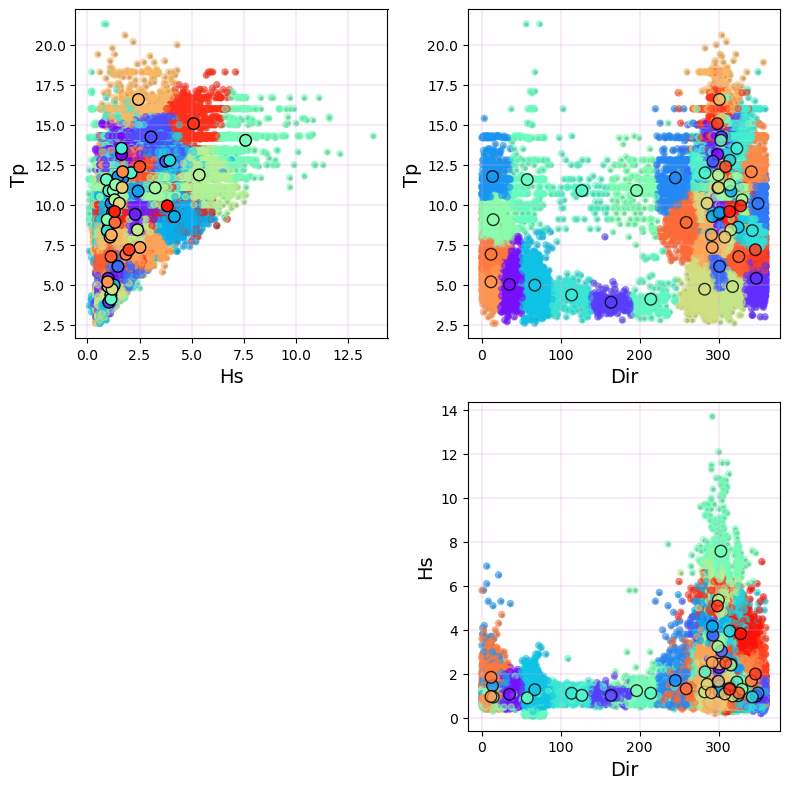

In [19]:
v1, v1_l = data.hs.values, 'Hs'
v2, v2_l = data.tp.values, 'Tp'
v3, v3_l = data.dir.values, 'Dir'

fig = plt.figure(figsize = [8, 8], tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0,0])
ax.scatter(v1,v2,c='k', s=5, alpha=.3)
ax.set_xlabel(v1_l, fontsize = 14); ax.set_ylabel(v2_l, fontsize = 14)
ax.grid(':', color = 'plum', linewidth=.3)

ax1 = fig.add_subplot(gs[0,1])
ax1.scatter(v3,v2,c='k', s=5, alpha=.3)
ax1.set_xlabel(v3_l, fontsize = 14); ax1.set_ylabel(v2_l, fontsize = 14)
ax1.grid(':', color = 'plum', linewidth=.3)


ax2 = fig.add_subplot(gs[1,1])
ax2.scatter(v3,v1,c='k', s=5, alpha=.3)
ax2.set_xlabel(v3_l, fontsize = 14); ax2.set_ylabel(v1_l, fontsize = 14)
ax2.grid(':', color = 'plum', linewidth=.3)

# Centroids
im = ax.scatter(centroids[:,0], centroids[:,1], s=70, c=range(len(centroids)), cmap='rainbow',
                vmin=0, vmax=n_subset, alpha=1, edgecolor = 'black', zorder=3)

ax1.scatter(centroids[:,2], centroids[:,1], s=70, c=range(len(centroids)), cmap='rainbow',
                vmin=0, vmax=n_subset, alpha=.8, edgecolor = 'black', zorder=3)

ax2.scatter(centroids[:,2], centroids[:,0], s=70, c=range(len(centroids)), cmap='rainbow',
                vmin=0, vmax=n_subset, alpha=.8, edgecolor = 'black', zorder=3)


#Cluster
im = ax.scatter(v1, v2, c=bmus, s=20, cmap='rainbow', vmin=0, vmax=n_subset,
                alpha=.5, label = 'Data Points')

im = ax1.scatter(v3, v2, c=bmus, s=20, cmap='rainbow', vmin=0, vmax=n_subset,
                alpha=.5, label = 'Data Points')

im = ax2.scatter(v3, v1, c=bmus, s=20, cmap='rainbow', vmin=0, vmax=n_subset,
                alpha=.5, label = 'Data Points')

## Predict cluster for a Given Value of Hs, Tp and Dir

In [20]:
Values = np.array([[7, 15, 290],[3, 10, 200]])
Values.shape

(2, 3)

In [21]:
Values_norm, _, _= Normalize(Values, ix_scalar, ix_directional, minis = minis, maxis = maxis)


In [22]:
bmus_pred = kma.predict(Values_norm)
bmus_pred

array([24, 25], dtype=int32)

In [23]:
center = centroids[bmus_pred, :]
center

array([[  7.58158568,  14.02966752, 303.00255754],
       [  1.23842365,  10.89507389, 196.14285714]])